http://localhost:8888/notebooks/jupyter-notebook/GaussianInformationGeometryEmbedding.ipynb

In [1]:
# Author: Kyle Cranmer <kyle.cranmer@nyu.edu>
# Licence: BSD

%load_ext autotime
%matplotlib inline

import os
#os.chdir('')

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.cm as cm
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-colorblind')
rcParams['figure.figsize'] = 15, 6

print(__doc__)

from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

# Next line to silence pyflakes.
Axes3D

Automatically created module for IPython interactive environment


mpl_toolkits.mplot3d.axes3d.Axes3D

In [2]:
#make some random samples in 2d
n_samples = 50
seed = np.random.RandomState(seed=3)

#create a set of Gaussians in a grid of mean (-1.5,1.5) and standard devaition (0.2,5)
gridMuSigma=[]
for i in np.linspace(-1.5,1.5,n_samples):
    for j in np.linspace(.2,5,n_samples):
        gridMuSigma.append([i,j])
gridMuSigma=np.array(gridMuSigma)

time: 6.94 ms


In [3]:
#use 2-d Gaussian information metric for distances
# see equation 7 from http://arxiv.org/abs/0802.2050 ("FINE" paper)
def getDistance(x,y):
    #going to define a measure here
    #print 'in getSim', x, y
    aa = x[0]-y[0]
    ab = x[1]+y[1]
    bb = x[1]-y[1]
    num = np.sqrt((aa**2+ab**2))+np.sqrt((aa**2+bb**2))
    den = np.sqrt((aa**2+ab**2))-np.sqrt((aa**2+bb**2))
    ret = np.log(num/den)
    return ret

time: 2.97 ms


In [4]:
# Create the array of "dissimilarities" (distances) between points
tempSim=[]
for x in gridMuSigma:
    temp = []
    for y in gridMuSigma:
        temp.append(getDistance(x,y))
    tempSim.append(temp)
distances=np.array(tempSim)

time: 58.4 s


In [5]:
#make 3d embedding 
mds = manifold.MDS(n_components=3, metric=True, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
embed3d = mds.fit(distances).embedding_

#make 2d embedding
mds2 = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
embed2d = mds2.fit(distances).embedding_

time: 33min 7s


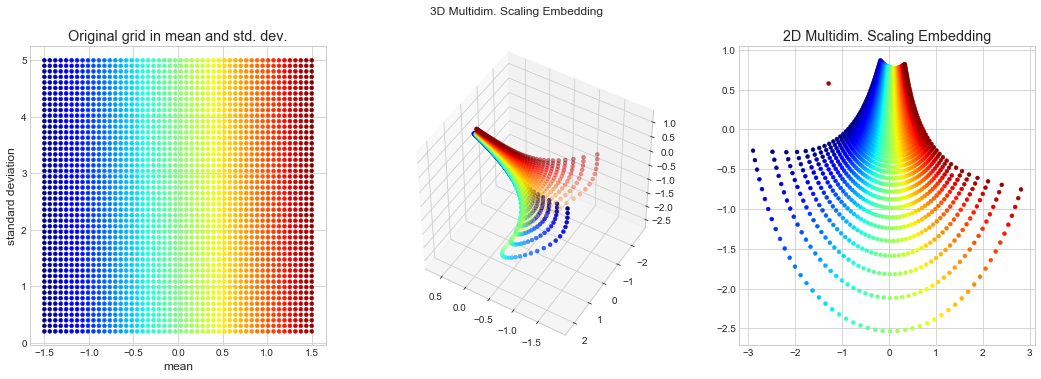

time: 1.16 s


In [6]:
#Setup plots
fig = plt.figure(figsize=(18,5.5))

# choose a different color for each point
colors = plt.cm.jet(np.linspace(0, 1, len(gridMuSigma)))

#make original grid plot
gridsubpl = fig.add_subplot(131)
gridsubpl.scatter(gridMuSigma[:, 0], gridMuSigma[:, 1], s=15, c=colors)
gridsubpl.set_xlabel('mean')
gridsubpl.set_ylabel('standard deviation')
plt.title('Original grid in mean and std. dev.')
plt.axis('tight')

# plot 3d embedding
#since it is a surface of constant negative curvature (hyperbolic geometry)
#expect it to look like the pseudo-sphere
#http://mathworld.wolfram.com/Pseudosphere.html
subpl = fig.add_subplot(132,projection='3d')
subpl.scatter(embed3d[:, 0], embed3d[:, 1], embed3d[:, 2], s=15, c=colors)
#subpl.view_init(42, 101) #looks good when njobs=-1
#subpl.view_init(-130,-33)#looks good when njobs=1
subpl.view_init(46, 121)

plt.suptitle('3D Multidim. Scaling Embedding')
plt.axis('tight')

# plot 2d embedding
subpl2 = fig.add_subplot(133)
subpl2.set_autoscaley_on(False)
subpl2.scatter(embed2d[:, 0], embed2d[:, 1], s=15, c=colors)
plt.title('2D Multidim. Scaling Embedding')
plt.axis('tight')

plt.show()

(-1.9966181206222855,
 0.7951101362462373,
 -2.865568107563383,
 2.4801010498301883)

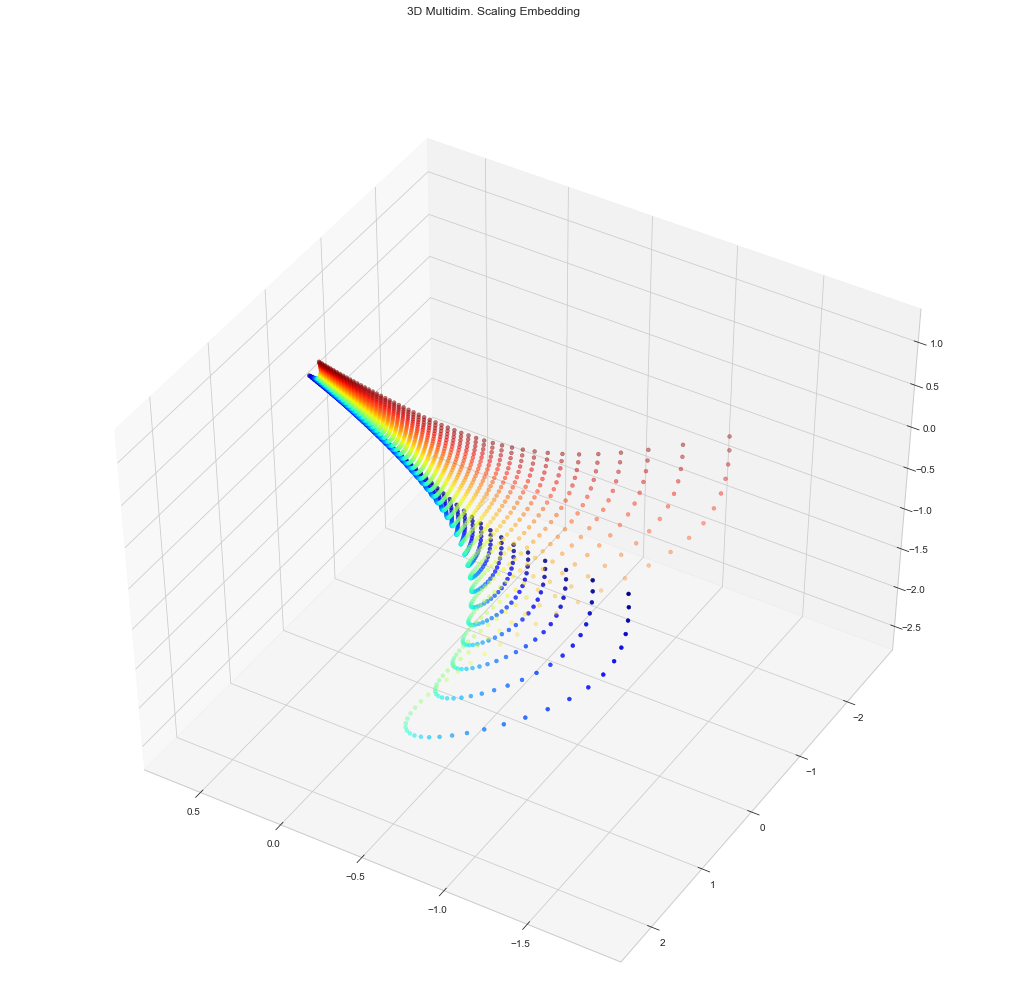

time: 530 ms


In [7]:
#Setup plots
fig = plt.figure(figsize=(18,16))
# choose a different color for each point
colors = plt.cm.jet(np.linspace(0, 1, len(gridMuSigma)))

subpl = fig.add_subplot(111,projection='3d')
subpl.scatter(embed3d[:, 0], embed3d[:, 1], embed3d[:, 2], s=15, c=colors)
subpl.view_init(46, 121) #looks good when njobs=-1
#subpl.view_init(-130,-33)#looks good when njobs=1

plt.suptitle('3D Multidim. Scaling Embedding')
plt.axis('tight')

(-3.189180089775251,
 3.102238596450174,
 -2.7089902851393965,
 1.0398685793236524)

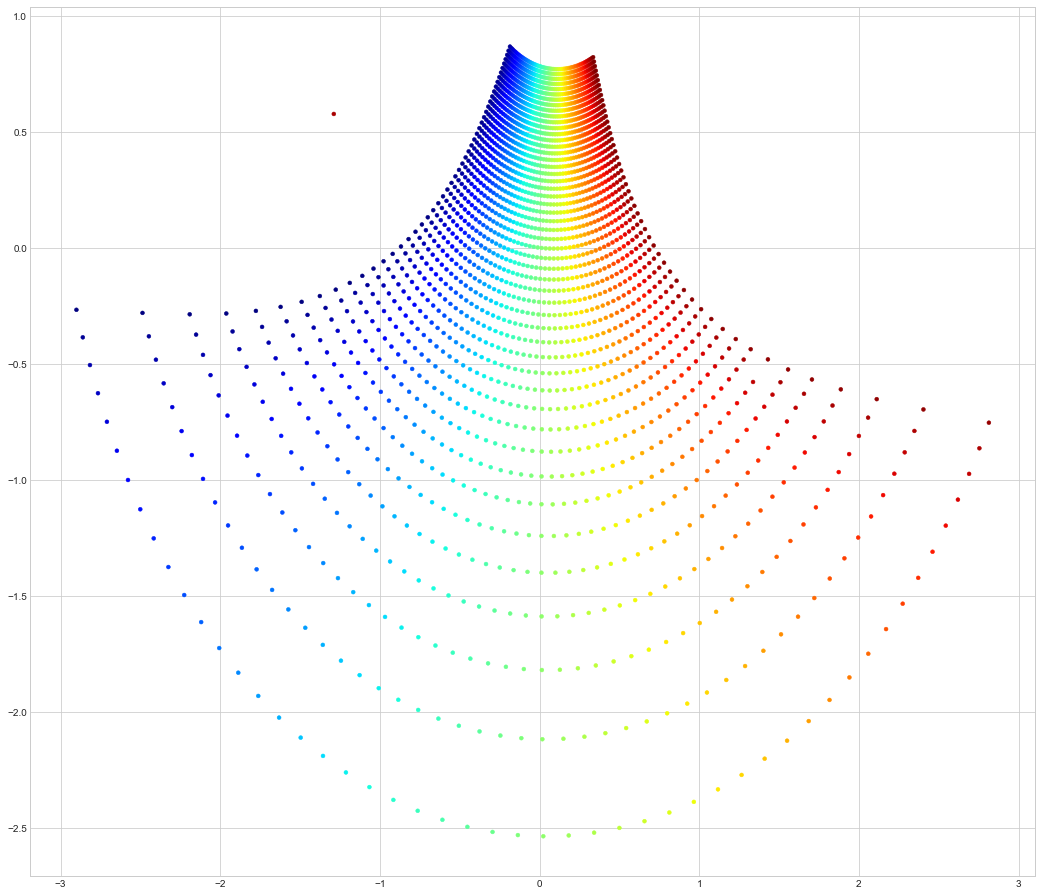

time: 303 ms


In [8]:
#Setup plots
fig = plt.figure(figsize=(18,16))
# choose a different color for each point
colors = plt.cm.jet(np.linspace(0, 1, len(gridMuSigma)))

subpl2 = fig.add_subplot(111)
subpl2.set_autoscaley_on(False)
subpl2.scatter(embed2d[:, 0], embed2d[:, 1], s=15, c=colors)
#plt.title('2D Multidim. Scaling Embedding')
plt.axis('tight')

(-3.189180089775251, 3.102238596450174, -2.826388888888889, 1.2113095238095237)

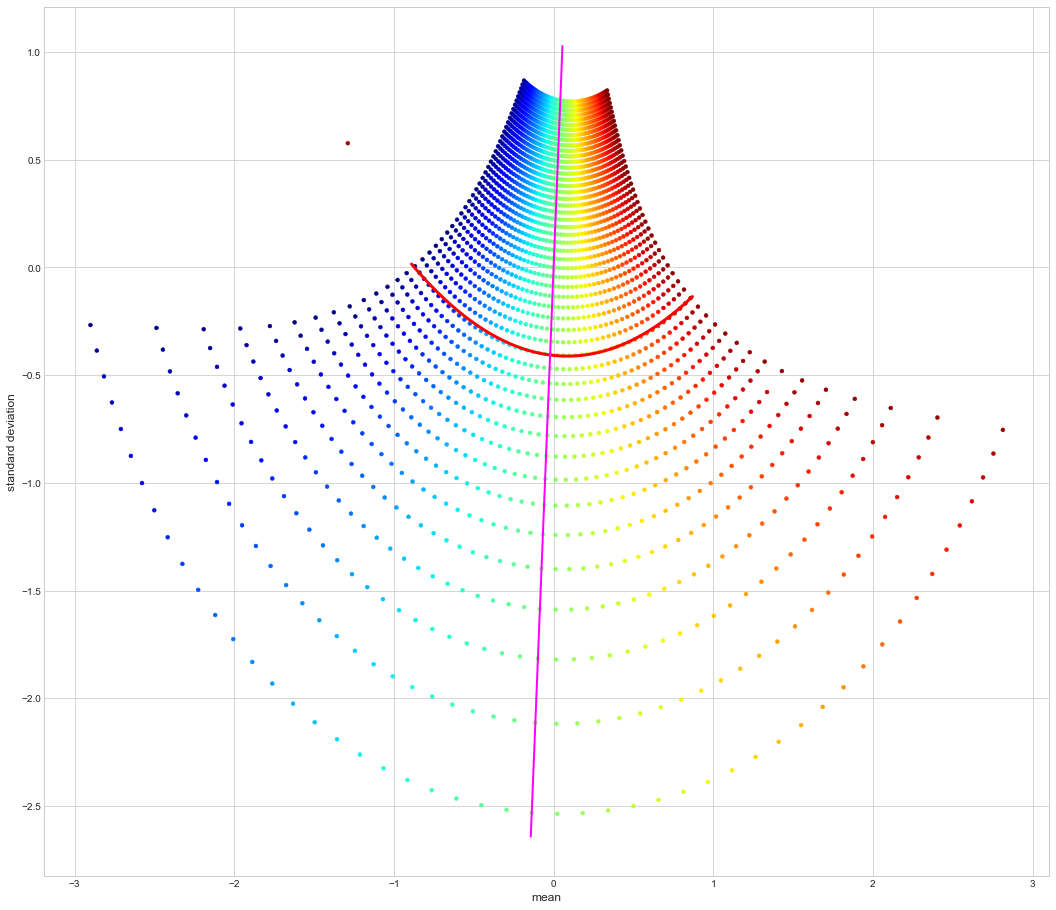

time: 332 ms


In [9]:
#Setup plots
fig = plt.figure(figsize=(18,16))
# choose a different color for each point
colors = plt.cm.jet(np.linspace(0, 1, len(gridMuSigma)))

x = np.linspace(-0.89, 0.87, 100)
y = 0.45*x**2 - 3.395 + np.exp(-0.034*(x+0.8)) + np.exp(-0.005*(x+0.1)) + np.exp(-0.008*(x+0.2)) + np.exp(0.028*(x-0.5)) - np.exp(0.06*(x-0.5))

x1 = np.linspace(-7**(-1), 18**(-1), 100)
y1 = 18.5*x1

subpl2 = fig.add_subplot(111)
subpl2.set_autoscaley_on(False)
subpl2.scatter(embed2d[:, 0], embed2d[:, 1], s=15, c=colors)
subpl2.plot(x, y, c='red', lw=3)
subpl2.plot(x1, y1, c='magenta', lw=2)
subpl2.set_xlabel('mean')
subpl2.set_ylabel('standard deviation')
plt.axis('tight')

(-1.9966181206222855,
 0.7951101362462373,
 -2.865568107563383,
 2.4801010498301883)

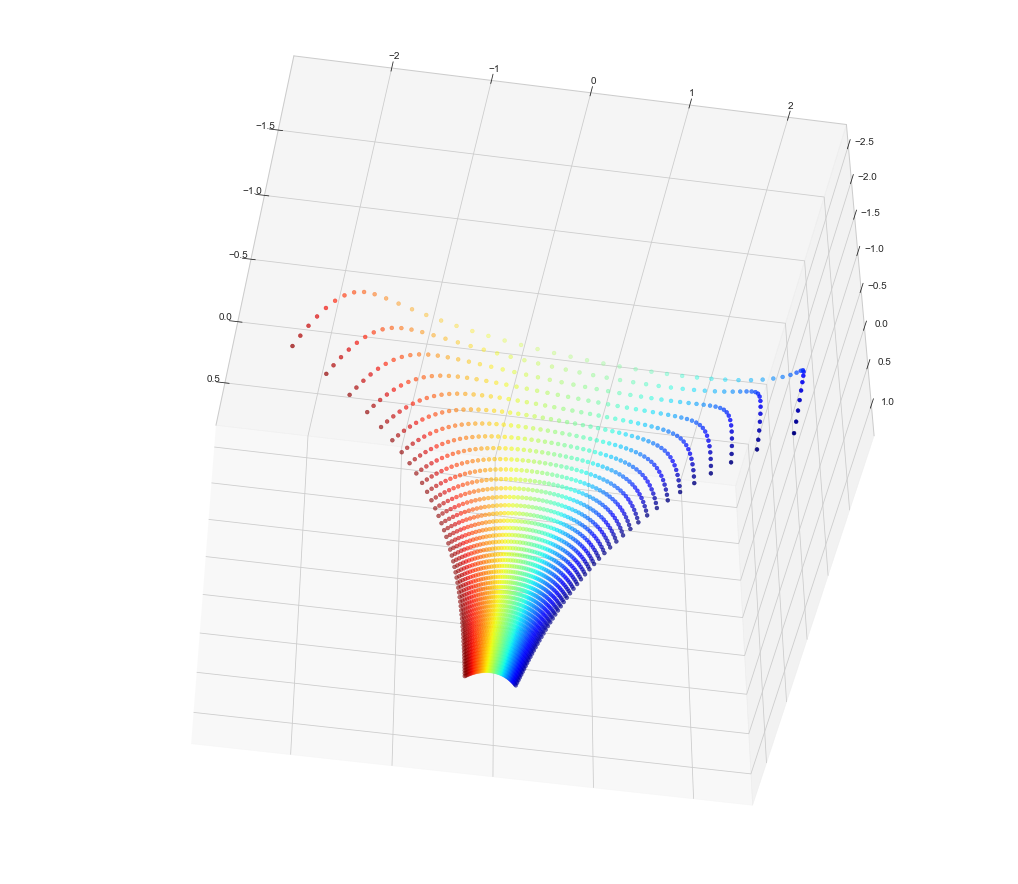

time: 468 ms


In [10]:
#Setup plots
fig = plt.figure(figsize=(18,16))
# choose a different color for each point
colors = plt.cm.jet(np.linspace(0, 1, len(gridMuSigma)))

subpl = fig.add_subplot(111, projection='3d')
subpl.scatter(embed3d[:, 0], embed3d[:, 1], embed3d[:, 2], s=15, c=colors)
#subpl.view_init(20, 91) #looks good when njobs=-1
subpl.view_init(130,10)#looks good when njobs=1

plt.axis('tight')

(-1.9966181206222855,
 0.7951101362462373,
 -2.865568107563383,
 2.4801010498301883)

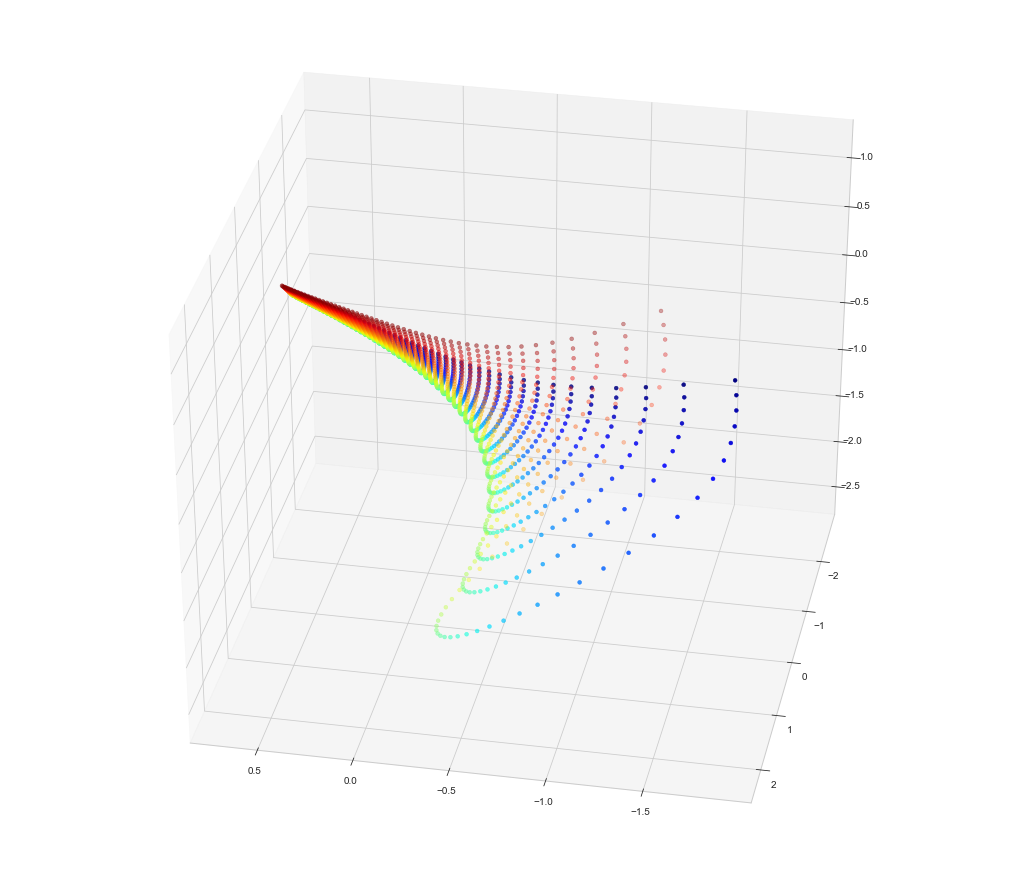

time: 484 ms


In [11]:
#Setup plots
fig = plt.figure(figsize=(18,16))
# choose a different color for each point
colors = plt.cm.jet(np.linspace(0, 1, len(gridMuSigma)))

subpl = fig.add_subplot(111,projection='3d')
subpl.scatter(embed3d[:, 0], embed3d[:, 1], embed3d[:, 2], s=15, c=colors)
subpl.view_init(35, 101) #looks good when njobs=-1
#subpl.view_init(-130,-33)#looks good when njobs=1

plt.axis('tight')

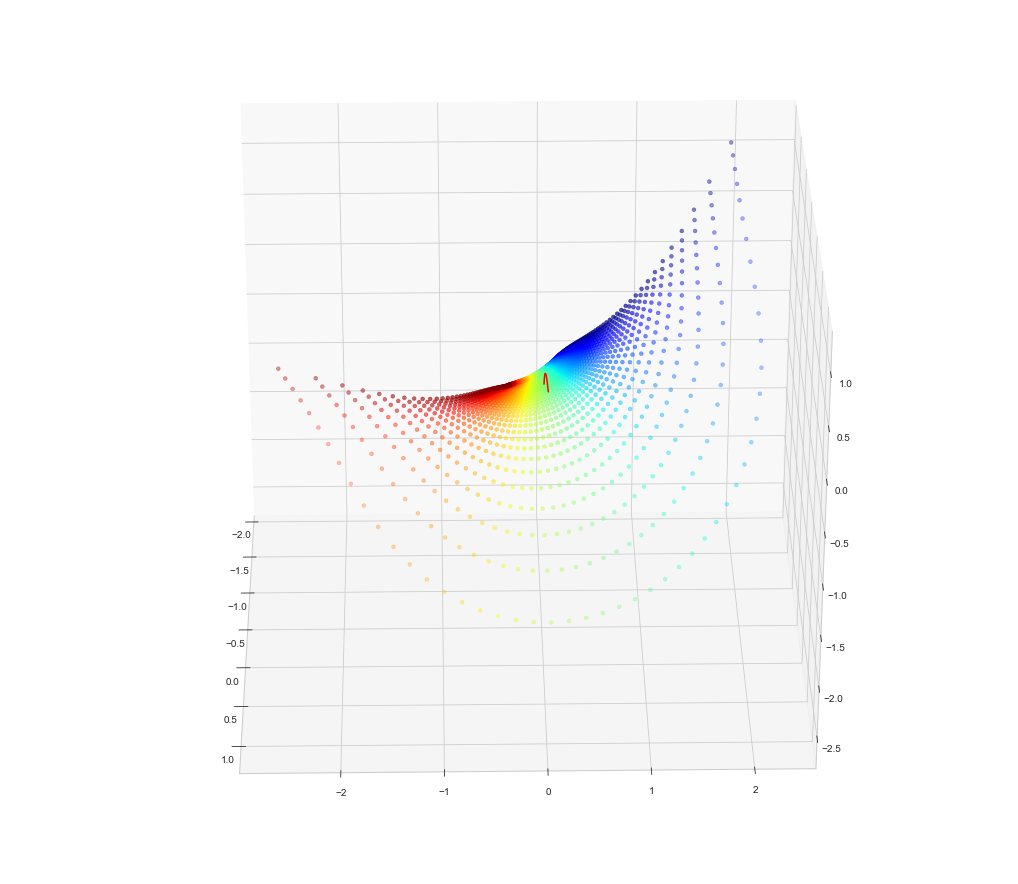

time: 1min 29s


In [12]:
#Setup plots
fig = plt.figure(figsize=(18,16))
# choose a different color for each point
colors = plt.cm.jet(np.linspace(0, 1, len(gridMuSigma)))

z = np.linspace(0, 0.7, 100)
x = (np.exp(1.8*z)+np.exp(-0.5*z))/2-1
y = z*0

subpl = fig.add_subplot(111, projection='3d')
subpl.scatter(embed3d[:, 0], embed3d[:, 1], embed3d[:, 2], s=15, c=colors)
subpl.plot(x, y, z, c='red')

dataname = 'norm'

for angle in range(0, 360):
    subpl.view_init(30, angle)
    plt.savefig("figs{0}_{1:03d}.jpg".format(dataname, angle))